In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.decomposition import PCA
import plotly.express as px
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from collections import OrderedDict
import matplotlib.gridspec as gridspec

### Loading Data

In [2]:
data_loader_unscaled = np.load('ProcessedData/PreprocesssedData_Unscaled.npz', allow_pickle = True)
df_districts = pd.DataFrame(
    data = data_loader_unscaled['data'],
    index = pd.MultiIndex.from_tuples(data_loader_unscaled['index'],
                                      names = data_loader_unscaled['index_names']),
    columns = pd.MultiIndex.from_tuples(data_loader_unscaled['columns'],
                                        names = data_loader_unscaled['columns_names'])
)
data_loader_scaled = np.load('ProcessedData/PreprocesssedData.npz', allow_pickle = True)
df_districts_scaled = pd.DataFrame(
    data = data_loader_scaled['data'],
    index = pd.MultiIndex.from_tuples(data_loader_scaled['index'],
                                      names = data_loader_scaled['index_names']),
    columns = pd.MultiIndex.from_tuples(data_loader_scaled['columns'],
                                        names = data_loader_scaled['columns_names'])
)
df_districts.info()
df_districts

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 640 entries, ('NICOBARS', 'ANDAMANNICOBARISLANDS') to ('PURBAMEDINIPUR', 'WESTBENGAL')
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (Female_pct, 1901)          640 non-null    float64
 1   (Female_pct, 1911)          640 non-null    float64
 2   (Female_pct, 1921)          640 non-null    float64
 3   (Female_pct, 1931)          640 non-null    float64
 4   (Female_pct, 1941)          640 non-null    float64
 5   (Female_pct, 1951)          640 non-null    float64
 6   (Female_pct, 1961)          640 non-null    float64
 7   (Female_pct, 1971)          640 non-null    float64
 8   (Female_pct, 1981)          640 non-null    float64
 9   (Female_pct, 1991)          640 non-null    float64
 10  (Female_pct, 2001)          640 non-null    float64
 11  (Female_pct, 2011)          640 non-null    float64
 12  (Pct_var_since_last, 1911) 

Female_pct             \
Year                                                1901       1911   
Name                    StateName                                     
NICOBARS                ANDAMANNICOBARISLANDS  45.676547  45.191653   
NORTHMIDDLEANDAMAN      ANDAMANNICOBARISLANDS  16.430919  16.468341   
SOUTHANDAMAN            ANDAMANNICOBARISLANDS  16.428764  16.457449   
ADILABAD                ANDHRAPRADESH          49.767194  49.394224   
NIZAMABAD               ANDHRAPRADESH          50.144858  50.145012   
...                                                  ...        ...   
HAORA                   WESTBENGAL             48.322426  47.149980   
KOLKATA                 WESTBENGAL             34.895079  33.820707   
SOUTHTWENTYFOURPARGANAS WESTBENGAL             48.116473  47.208953   
PASCHIMMEDINIPUR        WESTBENGAL             50.155053  49.995968   
PURBAMEDINIPUR          WESTBENGAL             50.155006  49.995988   

                                                                     \
Year                                                1921       1931   
Name                    StateName                                     
NICOBARS                ANDAMANNICOBARISLANDS  43.464193  46.835938   
NORTHMIDDLEANDAMAN      ANDAMANNICOBARISLANDS  12.700029  25.832547   
SOUTHANDAMAN            ANDAMANNICOBARISLANDS  12.705667  25.825851   
ADILABAD                ANDHRAPRADESH          48.837121  48.886006   
NIZAMABAD               ANDHRAPRADESH          50.402421  49.755365   
...                                                  ...        ...   
HAORA                   WESTBENGAL             46.345559  45.482483   
KOLKATA                 WESTBENGAL             33.464912  32.725302   
SOUTHTWENTYFOURPARGANAS WESTBENGAL             46.564336  46.404160   
PASCHIMMEDINIPUR        WESTBENGAL             49.762899  49.375544   
PURBAMEDINIPUR          WESTBENGAL             49.762955  49.375591   

                                                                     \
Year                                                1941       1951   
Name                    StateName                                     
NICOBARS                ANDAMANNICOBARISLANDS  47.108898  47.364477   
NORTHMIDDLEANDAMAN      ANDAMANNICOBARISLANDS  30.224924  32.841328   
SOUTHANDAMAN            ANDAMANNICOBARISLANDS  30.234512  32.846715   
ADILABAD                ANDHRAPRADESH          49.342754  50.193963   
NIZAMABAD               ANDHRAPRADESH          49.843247  50.463793   
...                                                  ...        ...   
HAORA                   WESTBENGAL             44.076443  44.754939   
KOLKATA                 WESTBENGAL             31.961330  37.224127   
SOUTHTWENTYFOURPARGANAS WESTBENGAL             45.843134  46.258002   
PASCHIMMEDINIPUR        WESTBENGAL             48.860737  48.980004   
PURBAMEDINIPUR          WESTBENGAL             48.860762  48.673377   

                                                                     \
Year                                                1961       1971   
Name                    StateName                                     
NICOBARS                ANDAMANNICOBARISLANDS  46.576942  43.937226   
NORTHMIDDLEANDAMAN      ANDAMANNICOBARISLANDS  34.627797  40.606656   
SOUTHANDAMAN            ANDAMANNICOBARISLANDS  36.285068  36.515563   
ADILABAD                ANDHRAPRADESH          49.514115  49.387898   
NIZAMABAD               ANDHRAPRADESH          50.176476  49.965354   
...                                                  ...        ...   
HAORA                   WESTBENGAL             44.694397  45.446464   
KOLKATA                 WESTBENGAL             38.639970  39.841858   
SOUTHTWENTYFOURPARGANAS WESTBENGAL             47.943863  47.826976   
PASCHIMMEDINIPUR        WESTBENGAL             48.792453  48.631590   
PURBAMEDINIPUR          WESTBENGAL             48.755971  48.556791   

                                                                  

In [3]:
df_districts_scaled.info()
df_districts_scaled

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 640 entries, ('NICOBARS', 'ANDAMANNICOBARISLANDS') to ('PURBAMEDINIPUR', 'WESTBENGAL')
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (Female_pct, 1901)          640 non-null    float64
 1   (Female_pct, 1911)          640 non-null    float64
 2   (Female_pct, 1921)          640 non-null    float64
 3   (Female_pct, 1931)          640 non-null    float64
 4   (Female_pct, 1941)          640 non-null    float64
 5   (Female_pct, 1951)          640 non-null    float64
 6   (Female_pct, 1961)          640 non-null    float64
 7   (Female_pct, 1971)          640 non-null    float64
 8   (Female_pct, 1981)          640 non-null    float64
 9   (Female_pct, 1991)          640 non-null    float64
 10  (Female_pct, 2001)          640 non-null    float64
 11  (Female_pct, 2011)          640 non-null    float64
 12  (Pct_var_since_last, 1911) 

Female_pct                      \
Year                                                1901      1911      1921   
Name                    StateName                                              
NICOBARS                ANDAMANNICOBARISLANDS   0.057903  0.071987  0.018779   
NORTHMIDDLEANDAMAN      ANDAMANNICOBARISLANDS   0.001565  0.001565  0.000000   
SOUTHANDAMAN            ANDAMANNICOBARISLANDS   0.000000  0.000000  0.001565   
ADILABAD                ANDHRAPRADESH           0.585290  0.513302  0.477308   
NIZAMABAD               ANDHRAPRADESH           0.668232  0.687011  0.776213   
...                                                  ...       ...       ...   
HAORA                   WESTBENGAL              0.347418  0.247261  0.178404   
KOLKATA                 WESTBENGAL              0.004695  0.003130  0.003130   
SOUTHTWENTYFOURPARGANAS WESTBENGAL              0.331768  0.250391  0.200313   
PASCHIMMEDINIPUR        WESTBENGAL              0.671362  0.669797  0.658842   
PURBAMEDINIPUR          WESTBENGAL              0.669797  0.671362  0.660407   

                                                                             \
Year                                               1931      1941      1951   
Name                    StateName                                             
NICOBARS                ANDAMANNICOBARISLANDS  0.244131  0.267606  0.280125   
NORTHMIDDLEANDAMAN      ANDAMANNICOBARISLANDS  0.001565  0.000000  0.000000   
SOUTHANDAMAN            ANDAMANNICOBARISLANDS  0.000000  0.001565  0.001565   
ADILABAD                ANDHRAPRADESH          0.510172  0.622848  0.798122   
NIZAMABAD               ANDHRAPRADESH          0.676056  0.748044  0.841941   
...                                                 ...       ...       ...   
HAORA                   WESTBENGAL             0.097027  0.023474  0.042254   
KOLKATA                 WESTBENGAL             0.003130  0.003130  0.004695   
SOUTHTWENTYFOURPARGANAS WESTBENGAL             0.195618  0.123631  0.172144   
PASCHIMMEDINIPUR        WESTBENGAL             0.616588  0.505477  0.533646   
PURBAMEDINIPUR          WESTBENGAL             0.618153  0.507042  0.460094   

                                                                             \
Year                                               1961      1971      1981   
Name                    StateName                                             
NICOBARS                ANDAMANNICOBARISLANDS  0.200313  0.029734  0.039124   
NORTHMIDDLEANDAMAN      ANDAMANNICOBARISLANDS  0.000000  0.007825  0.021909   
SOUTHANDAMAN            ANDAMANNICOBARISLANDS  0.001565  0.000000  0.006260   
ADILABAD                ANDHRAPRADESH          0.693271  0.743349  0.777778   
NIZAMABAD               ANDHRAPRADESH          0.816901  0.863850  0.917058   
...                                                 ...       ...       ...   
HAORA                   WESTBENGAL             0.043818  0.092332  0.192488   
KOLKATA                 WESTBENGAL             0.006260  0.004695  0.009390   
SOUTHTWENTYFOURPARGANAS WESTBENGAL             0.384977  0.386541  0.431925   
PASCHIMMEDINIPUR        WESTBENGAL             0.524257  0.544601  0.604069   
PURBAMEDINIPUR          WESTBENGAL             0.511737  0.527387  0.547731   

                                                         ...  \
Year                                               1991  ...   
Name                    StateName                        ...   
NICOBARS                ANDAMANNICOBARISLANDS  0.087637  ...   
NORTHMIDDLEANDAMAN      ANDAMANNICOBARISLANDS  0.112676  ...   
SOUTHANDAMAN            ANDAMANNICOBARISLANDS  0.010955  ...   
ADILABAD                ANDHRAPRADESH          0.830986  ...   
NIZAMABAD               ANDHRAPRADESH          0.956182  ...   
...                                                 ...  ...   
HAORA                   WESTBENGAL             0.242567  ...   
KOLKATA                 WESTBENGAL             0.012520  ...   
SOUTHTW

In [4]:
df_districts.describe().transpose()

count       mean        std        min        25%  \
                   Year                                                       
Female_pct         1901   640.0  48.929607   2.971457  16.428764  47.470631   
                   1911   640.0  48.736758   3.023234  16.457449  47.207812   
                   1921   640.0  48.522264   3.171246  12.700029  46.976210   
                   1931   640.0  48.411317   2.659112  25.825851  46.918223   
                   1941   640.0  48.390230   2.452593  30.224924  46.909481   
                   1951   640.0  48.458289   2.355951  32.841328  47.043867   
                   1961   640.0  48.338425   2.353308  34.627797  47.032408   
                   1971   640.0  48.079141   2.080884  36.515563  46.875669   
                   1981   640.0  48.136358   1.891007  39.445691  46.961791   
                   1991   640.0  48.024292   1.644709  41.606925  46.879841   
                   2001   640.0  48.250451   1.702061  37.157094  47.220677   
                   2011   640.0  48.547080   1.638332  34.792570  47.542127   
Pct_var_since_last 1911   640.0   9.758683  14.384261 -33.120000   1.869495   
                   1921   640.0   0.735693   8.968256 -35.354765  -4.248702   
                   1931   640.0  13.392000  10.810856  -8.412628   7.229683   
                   1941   640.0  15.820250  10.940458  -2.423842  10.201679   
                   1951   640.0  14.427646  12.045085 -15.681833   8.005414   
                   1961   640.0  27.003568  31.149630 -32.443940  16.338919   
                   1971   640.0  28.912155  19.848507   2.211530  20.320344   
                   1981   640.0  28.209620  16.902712 -12.499545  21.040596   
                   1991   640.0  27.206838  14.975493  -5.018641  19.913506   
                   2001   640.0  22.915116  11.908881  -2.767453  15.766756   
                   2011   640.0  17.759388  11.285370 -58.477065  12.101644   
AvgPopGrowth              640.0  19.438936  11.044606  -2.724502  14.152814   
AvgFemPct                 640.0  48.366081   2.067750  32.129755  47.204879   
FemaleMWpct        Rural  640.0   5.747054   3.922980   0.000000   2.570713   
                   Urban  640.0   1.417039   1.486376   0.000000   0.444813   
MaleMWpct          Rural  640.0  13.868422   4.341574   0.000000  11.585091   
                   Urban  640.0   6.075259   5.522801   0.000000   2.446504   
TotMWpct                  640.0  27.107774   6.914873  11.513079  22.117534   

                                50%        75%         max  
                   Year                                     
Female_pct         1901   49.370641  50.500162   55.744008  
                   1911   49.274492  50.425533   54.681231  
                   1921   48.899955  50.186840   55.345276  
                   1931   48.828843  49.994947   55.692713  
                   1941   48.815201  49.861269   53.898686  
                   1951   48.870758  49.920734   55.328043  
                   1961   48.704240  49.821229   57.577031  
                   1971   48.456703  49.415749   55.808443  
                   1981   48.414491  49.347155   55.711464  
                   1991   48.230902  49.099316   54.652581  
                   2001   48.407298  49.343662   53.424025  
                   2011   48.698604  49.562465   54.220872  
Pct_var_since_last 1911    8.187401  15.851003  133.988457  
                   1921   -0.437444   4.454400   61.253972  
                   1931   11.559109  16.754582  102.492193  
                   1941   14.095887  18.395818  129.046626  
                   1951   12.424418  18.331047  120.788368  
                   1961   21.438832  28.989608  528.782918  
                   1971   25.489357  30.953686  312.166164  
                   1981   24.896069  30.506084  209.970622  
                   1991   24.508000  30.026070  163.394802  
                   2001   21.832737  27.598288  105.595525  
                   2011   17.0670

### Determining Number of Clusters
Now that we I have the data ready, I can apply KMeans Clustering on it. However, one important consideration for KMeans is number of clusters - how many groups should the dataset be divided into. I'll attempt to look at several approaches to this - fortunately (or unfortunately) most of them are visual. Elbow Method is the most popular approach among them. Before that though, I want to visualize just the data - it would be best if we can get even a rough idea of the number of clusters by just looking at the data. Unfortunately for us, we have 30 features, and we can't visualize anything beyond 2nd (or 3rd, if we try harder) dimensions. So, I'll first attempt a Principal Component Analysis (PCA) to reduce the dimensionality of the data and then try to visualize it. I don't have very high hopes though, since the level of dimensionality reduction is pretty severe.

In [5]:
pca_3d = PCA(n_components = 3, random_state = 76)
pca_data_3d = pca_3d.fit_transform(df_districts_scaled)
print('Shape of PCA Data : {}'.format(pca_data_3d.shape))
print('PCA Explained Variance Ratios for Principal Components 1, 2 & 3 respectively: {}'.\
      format(pca_3d.explained_variance_ratio_))
print('Total Variance explained by 3 Principal Components : {}%'.\
      format(round(sum(pca_3d.explained_variance_ratio_), 2) * 100))

Shape of PCA Data : (640, 3)
PCA Explained Variance Ratios for Principal Components 1, 2 & 3 respectively: [0.40497666 0.1404837  0.10441526]
Total Variance explained by 3 Principal Components : 65.0%


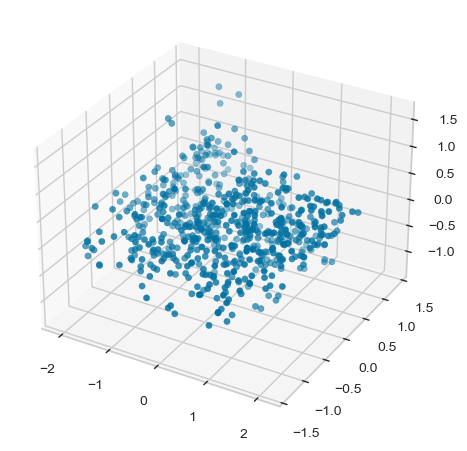

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(pca_data_3d[:, 0], pca_data_3d[:, 1], pca_data_3d[:, 2])
plt.show()
plt.close()

Let's take a look through plotly, may offer better visibility.

In [7]:
fig = px.scatter_3d(x = pca_data_3d[:, 0],
                    y = pca_data_3d[:, 1],
                    z = pca_data_3d[:, 2],
                    labels = {'x' : 'PC1',
                              'y' : 'PC2',
                              'z' : 'PC3'})

# fig.show()
# Figure removed from output to reduce notebook size
# ineractive html plots available at https://1drv.ms/f/s!Ag4Lt0BAwivG5QMDT-lICszZG-Sy?e=ZHTGNB
fig.write_html('InteractivePlotsMaps/Clustering_PCA.html')

Unfortunately, I can't see clear divisions between these datapoints still. That does not mean that all the datapoints belong to the same cluster though. Think about 2 extreme datapoints - whichever angle you are looking at the points from, the point at the most down-left position and  the point at the most top-right position have enough euclidean distance between them. It's just that in a country as diverse as India, when you are looking at all 640 districts - there are always some districts filling in the gap between two extreme set of points. Also note that the 3 Principal Components only explain 65% variability of the actual data.

Let's look at the example of a single state - West Bengal (being my state and all).

In [8]:
df_pca = df_districts.drop(df_districts.iloc[:, :], axis = 1).reset_index()
df_pca['PC1'] = pca_data_3d[:, 0]
df_pca['PC2'] = pca_data_3d[:, 1]
df_pca['PC3'] = pca_data_3d[:, 2]
df_pca

,Name,StateName,PC1,PC2,PC3
Year,,,,,
0,NICOBARS,ANDAMANNICOBARISLANDS,-1.278295,0.029692,0.198788
1,NORTHMIDDLEANDAMAN,ANDAMANNICOBARISLANDS,-1.725057,0.093237,0.071253
2,SOUTHANDAMAN,ANDAMANNICOBARISLANDS,-2.021495,-0.114043,0.113535
3,ADILABAD,ANDHRAPRADESH,0.708451,-0.672073,0.279308
4,NIZAMABAD,ANDHRAPRADESH,1.214449,-0.447985,0.478566
...,...,...,...,...,...
635,HAORA,WESTBENGAL,-1.098757,0.047325,0.613211
636,KOLKATA,WESTBENGAL,-1.394523,0.297717,1.333387
637,SOUTHTWENTYFOURPARGANAS,WESTBENGAL,-0.755819,-0.342745,0.069686


In [9]:
wb_pca = df_pca[df_pca.StateName == 'WESTBENGAL']

fig = px.scatter_3d(wb_pca,
                    x = 'PC1',
                    y = 'PC2',
                    z = 'PC3',
                    hover_name = 'Name')

# fig.show()
# Figure removed from output to reduce notebook size
# ineractive html plots available at https://1drv.ms/f/s!Ag4Lt0BAwivG5QMDT-lICszZG-Sy?e=ZHTGNB
fig.write_html('InteractivePlotsMaps/Clustering_PCA_WB.html')

Depending on which angle I'm looking from, I can see at least 3 and at most 6 clusters in West Bengal's PCA plot. However, this does not help us much in finding out how many clusters we need to use for all the districts - let's get back to that.

I want to look at the Elbow Plot now. Basically, I'm just going to fit Kmeans on this dataset with varying number of clusters and then plot corresponding Inertia (provided by the model itself). Inertia (also called Within Cluster Sum of Squares, or WCSS, Within Cluster Variance etc.) is basically the squared sum of distance between each point in the cluster and the cluster's centroid, summed again over all the clusters. I have also seen Distortion (if Inertia is sum of squared within cluster distances, Distortion is the average; i.e, we get a cluster's Distortion by dividing said cluster's Inertia by number of points in that cluster) being used in the Elbow Plot (in place of Inertia) - but I'll stick with Inertia (path of least resistance).

WCSS goes down as the number of clusters increases. The best model is supposed to be the balance between number of clusters and WCSS - lowest WCSS, with lowest number of clusters.

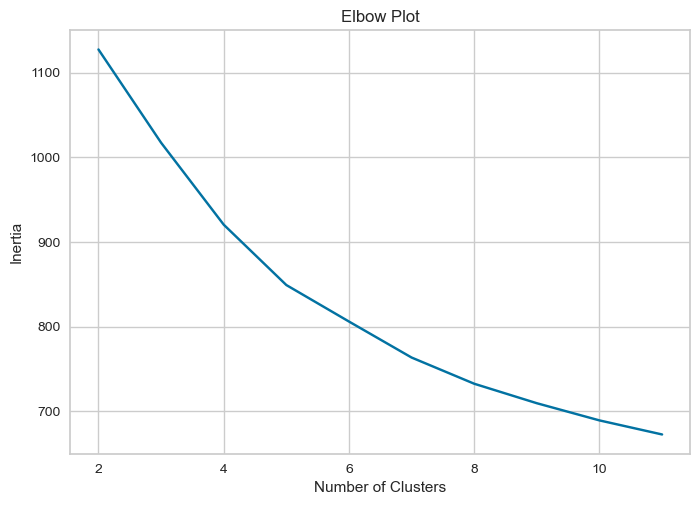

In [10]:
wcss = {}
for k in range(2, 12):
    km = KMeans(n_init = 50, random_state = 76, n_clusters = k)
    km.fit(df_districts_scaled)
    labels = km.labels_
    wcss[k] = km.inertia_
ax = sns.lineplot(x = wcss.keys(), y = wcss.values())
ax.set(xlabel = 'Number of Clusters',
       ylabel = 'Inertia',
       title = 'Elbow Plot')
plt.show()
plt.close()

I still can't be clear on the number of clusters. There is a slight dip at 5 clusters, but calling that an Elbow is a stretch. Honestly, the plot looks closer to a straight line. Problem is, no clear elbow for KMeans does not necessarily mean that there are no clusters, but it may indicate that the algorithm is unable to split the data into separate clusters. Let's explore further.

I will try next the Silhouette analysis. Silhouette score (or coefficient) is a measure of the cohesion (similarity) among intra-cluster (within same cluster) points compared to the separation (difference) among clusters. Silhouette score is a only part of Silhouette analysis though, it's usually largely dependent on the Silhouette plot. Similar to the Elbow plot, several Kmeans models with different number of clusters are fit on the dataset. In Silhouette plot though individual plots for each model is created - these plots show the average silhouette score (as a dotted line) and the clusters are also shown with various shapes (the shapes, or rather their size, being indicative of the cluster size, i.e., number of points in that cluster). The plots are then judged on 2 criteria -
1) Each cluster in the plot is supposed to cross the dotted line (average silhouette score), i.e., each cluster's individual silhouette score is supposed to be higher than the average silhouette score.
2) All the clusters are supposed to closer in size - meaning, number of datapoints in each cluster is supposed to be close.

I won't try to draw the silhouette plot from scratch, sklearn has an excellent article on that here : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html. However, I'd use the SilhouetteVisualizer from Yellowbrick, which rather streamlines the analysis. Yellowbrick also has a KElbowVisualizer - let's check that first. I first came across these through this article : https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d

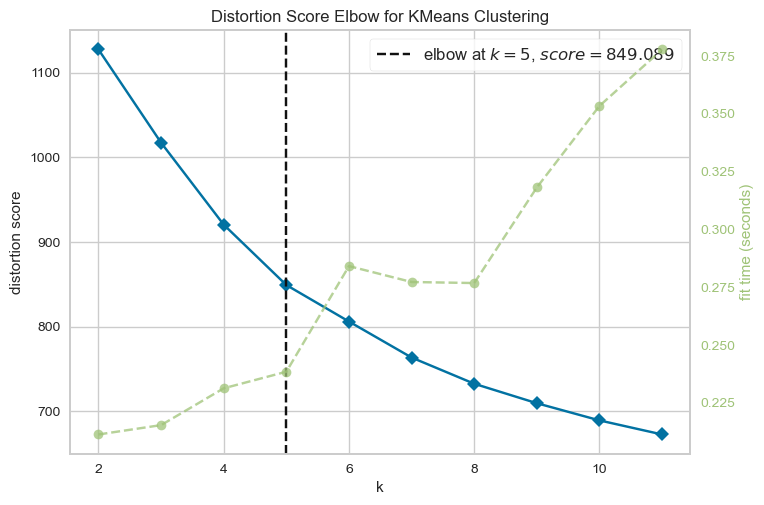

In [11]:
km = KMeans(n_init = 50, random_state = 76)
visualizer = KElbowVisualizer(km, k = (2, 12))

visualizer.fit(df_districts_scaled)
visualizer.show()
plt.show()
plt.close()

Text(0.5, 0.98, 'Silhouette Plot for KMeans with 3 to 7 Clusters')

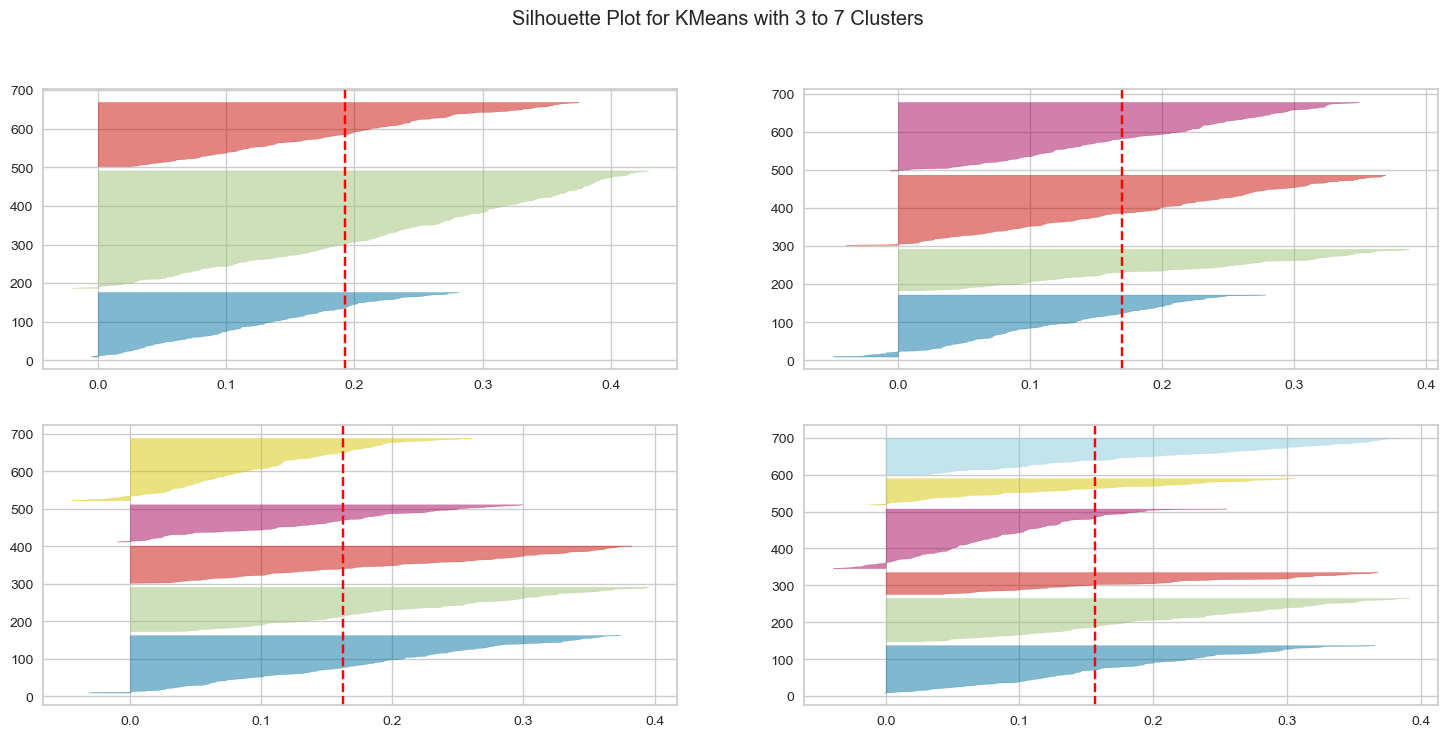

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(18,8))
for k in range(3, 7):
    km = KMeans(n_clusters = k, n_init = 50, random_state = 76)
    
    row, column = divmod(k - 3, 2) # quotient, remainder; used for subplot selection

    visualizer = SilhouetteVisualizer(km,
                                      colors = 'yellowbrick',
                                      ax = ax[row][column])
    visualizer.fit(df_districts_scaled)
fig.suptitle('Silhouette Plot for KMeans with 3 to 7 Clusters')

Looking at these plots, I can see that the 1st condition (each cluster's individual silhouette score should be higher than average silhouette score) is satisfied by all 4 plots. It all comes down to cluster size then - 3 and 6 clusters' plots have clearly different shaped clusters, so they are out. Both 4 and 5 clusters' plots are pretty close. I'm slightly partial towards the plot with 5 clusters - I think it looks slightly more balanced than the 4 clusters' plot, and negative values (indicating wrong cluster assignment) are slightly less. Plus 5 clusters is also what the Elbow plot(s) had recommended (more like suggested, since it wasn't a very strong recommendation). So, If I had to, I would go with 5 clusters.

But, this is not my only option. Thinking back to what I'm really trying to do here is to cluster these districts based on some features - the clustering is supposed to group the districts together for which these features are similar. And the way to define 'similarity' of the features is to use correlation - I can use the correlation of these features among these districts to determine which all districts are closer to each other, and then cluster the districts based on these correlation coefficients.

### New Approach
When I think about correlation based clustering, the first thing that comes to my mind is Hierarchical Clustering with correlation as the Dissimilarity Measure. Using correlation as the dissimilarity measure means we use pairwise correlation coefficients to decide how far (or close) two observations are - by using correlation based distance, as opposed to euclidean distance I was using in my earlier approaches (An Introduction to Statistical Learning with Applications in Python, June 2023, Page - 531).

Of course, I can still use KMeans as well, but rather than the dataset - I'll apply KMeans on the correlation matrix of the observations - let's try that first.

One more important consideration remains - whether to use scaled or unscaled data. Since, correlation is similar to scaling itself, it ideally should not matter whether I use scaled or unscaled data - both should result in same correlation coefficients. But that is true for linear scaling. Our dataset contains some severe outliers - I had used non-linear Quantile Transformer (with Uniform output distribution) in order to clip these outliers. These outliers can cause mayhem with correlation coefficients as well. However, I'll give the unscaled data a try first - if I see any issues, I'll switch back to scaled data.

For KMeans, I'll use the visualization tools introduced earlier (KElbowVisualizer and SilhouetteVisualizer) to determine the number of clusters. KMeans will require a correlation matrix with correlation among observations (rows in our case). The much used pandas dataframe.corr method calculates correlation coefficients among features (columns) - to use that, we'll have to Transpose our dataset, so that the districts form the columns. Or, I could use the numpy function corrcoef as well, that will give me the row-based correlation coefficients in a matrix form.

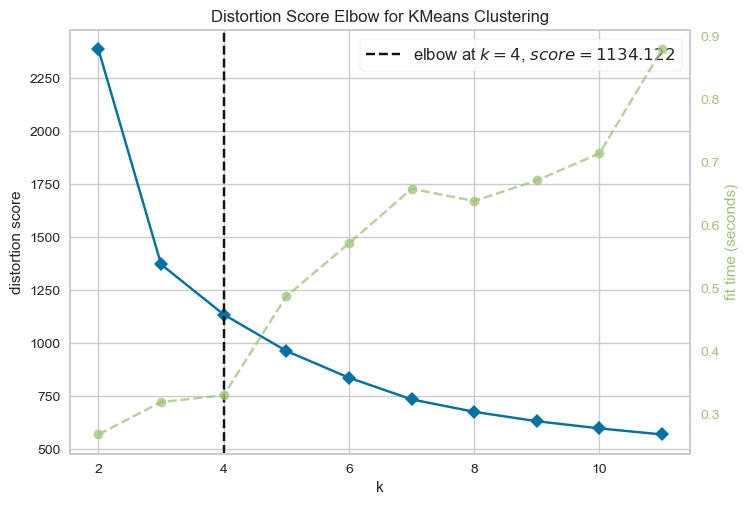

In [13]:
corr_matrix = df_districts.T.corr()
corr_dist_matrix = 1 - corr_matrix

km = KMeans(n_init = 50, random_state = 76)
visualizer = KElbowVisualizer(km, k = (2, 12))

visualizer.fit(corr_dist_matrix)
visualizer.show()
plt.show()
plt.close()

The Elbow Plot now shows a distinct but still not very prominent elbow. However, the abrupt change is seen at 3 clusters, but KElbowVisualizer is recommending 4 clusters - probably because distortion really plateaus after that. Let's look at the Silhouette Plot now.

Text(0.5, 0.98, 'Silhouette Plot for KMeans with 3 to 7 Clusters')

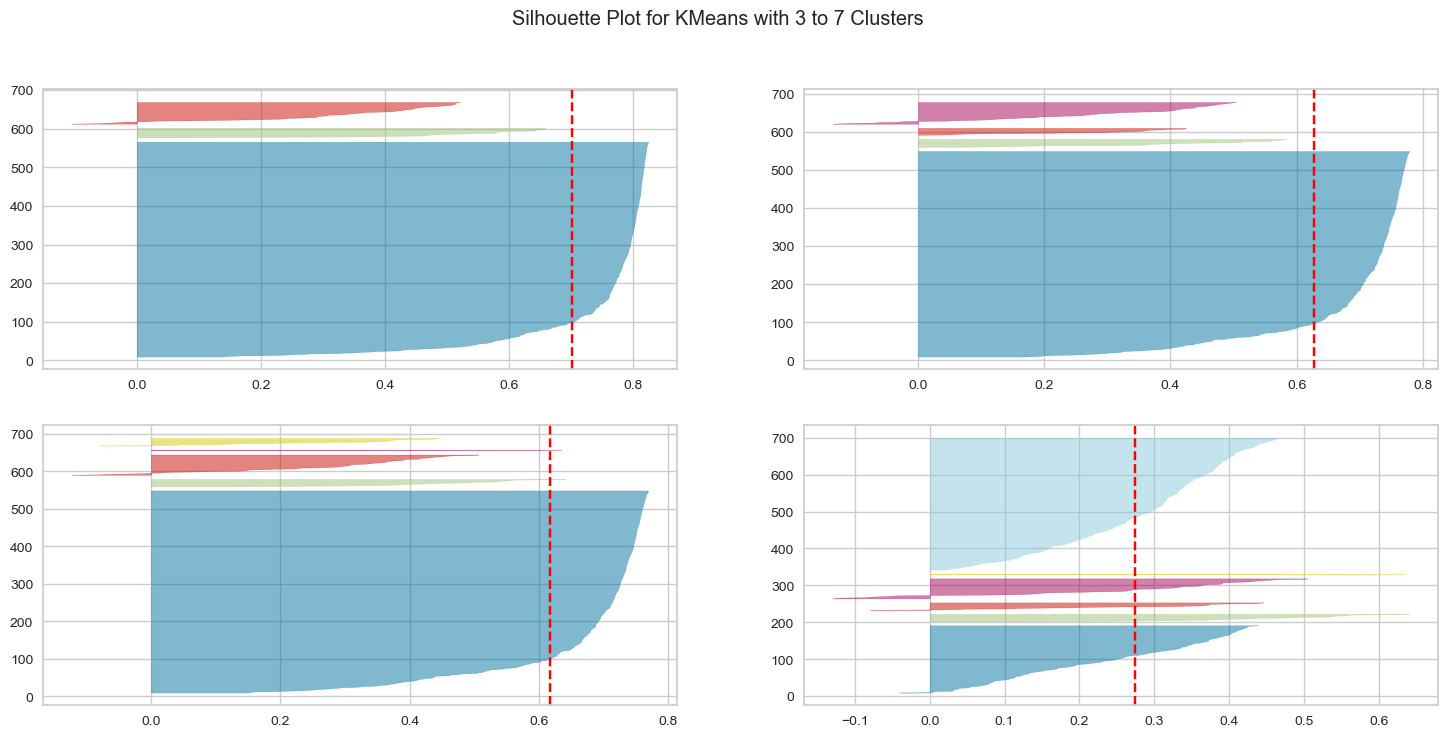

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(18,8))
for k in range(3, 7):
    km = KMeans(n_clusters = k, n_init = 50, random_state = 76)
    
    row, column = divmod(k - 3, 2)

    visualizer = SilhouetteVisualizer(km,
                                      colors = 'yellowbrick',
                                      ax = ax[row][column])
    visualizer.fit(corr_dist_matrix)
fig.suptitle('Silhouette Plot for KMeans with 3 to 7 Clusters')

And there it is - all the plots contain rather unbalanced clusters, probably caused by the presence of severe outliers. Let's switch back to our non-linearly scaled dataset.

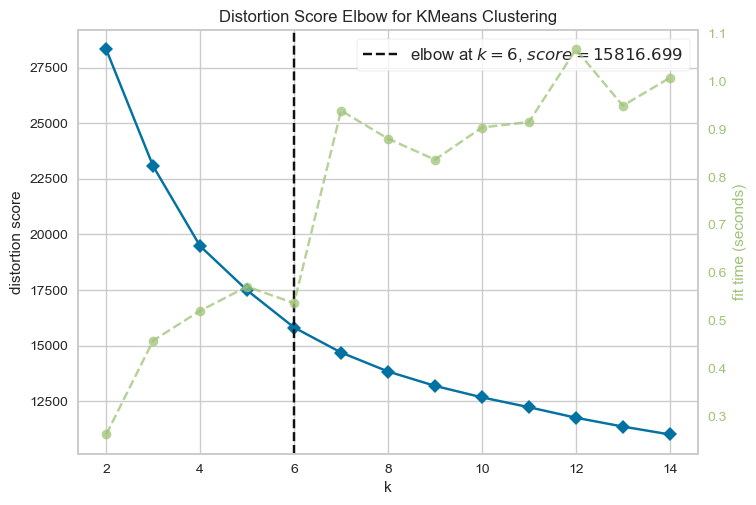

In [15]:
corr_matrix_scaled = np.corrcoef(df_districts_scaled)
corr_dist_matrix_scaled = 1 - corr_matrix_scaled

km = KMeans(n_init = 50, random_state = 76)
visualizer = KElbowVisualizer(km, k = (2, 15))

visualizer.fit(corr_dist_matrix_scaled)
visualizer.show()
plt.show()
plt.close()

Text(0.5, 0.98, 'Silhouette Plot for KMeans with 3 to 9 Clusters')

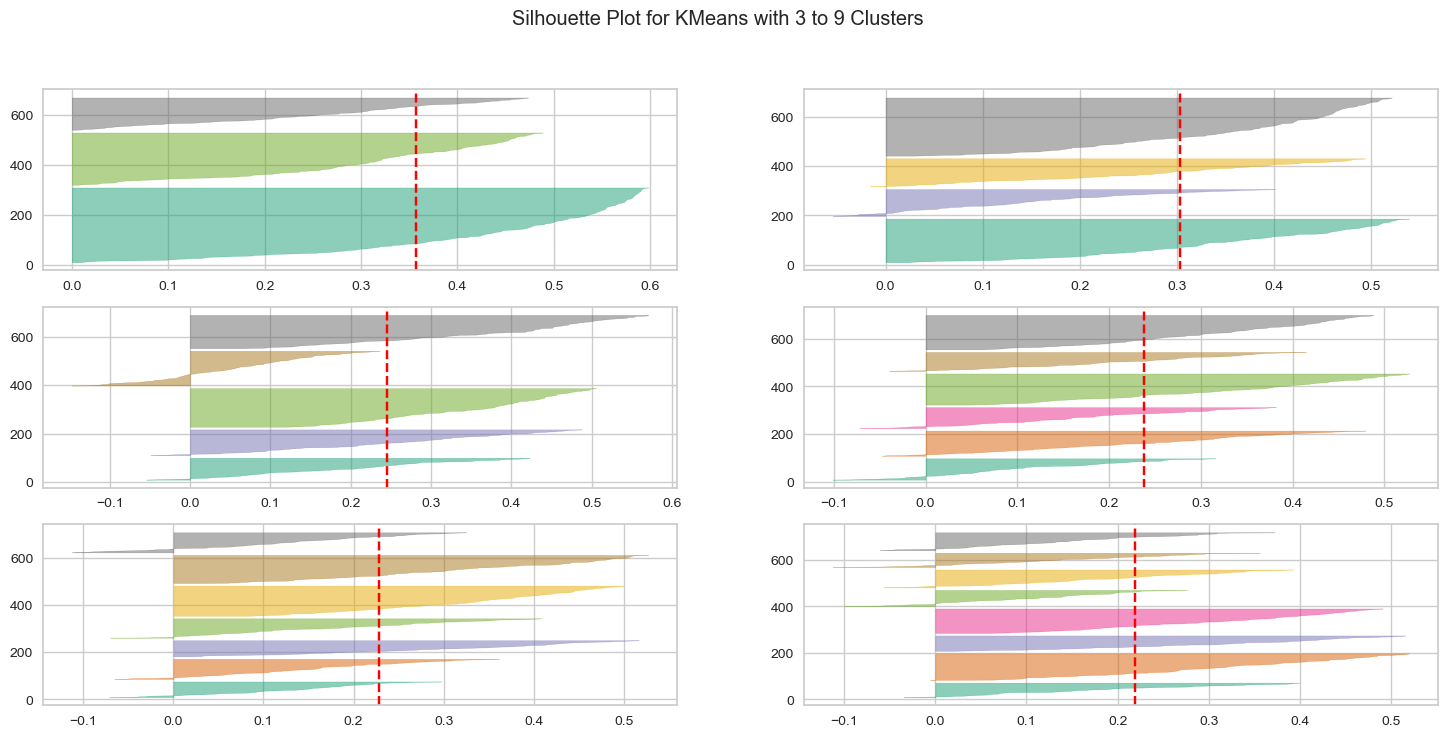

In [16]:
fig, ax = plt.subplots(3, 2, figsize=(18,8))
for k in range(3, 9):
    km = KMeans(n_clusters = k, n_init = 50, random_state = 76)
    
    row, column = divmod(k - 3, 2)

    visualizer = SilhouetteVisualizer(km,
                                      colors = 'Dark2',
                                      ax = ax[row][column])
    visualizer.fit(corr_dist_matrix_scaled)
fig.suptitle('Silhouette Plot for KMeans with 3 to 9 Clusters')

The elbow is less distinct with scaled data, but silhouette plot looks much more balanced. KElbowVisualizer recommends using 6 clusters, and Silhouette Analysis backs it up. 1st Silhouette analysis condition (silhouette score of all the individual clusters must be higher than the average) is actually satisfied by almost all the plots (except the one with 5 clusters), after taking into consideration the size of the clusters and presence of negative values - the plot with 6 clusters looks like the best one. We still need to look at Hierarchical Clustering.

For Hierarchical Clustering, I decided not to use ScikitLearn's AgglomerativeClustering. Apart from the scary name, with my very limited experience and knowledge of Hierarchical Clustering, plotting the dendrogram and taking a call on number of clusters seemed a rather complicated process - I could still probably use it looking at the code from somewhere (like this - https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html), but I wasn't confident with that. On the other hand, the scipy methods looked rather intuitive.

Other than using correlation-based metric as distance, I wanted to try out both Complete (largest distance between clusters) and Average (average of pairwise distance between individual datapoints of clusters) linakge options - let's look at the dendrograms.

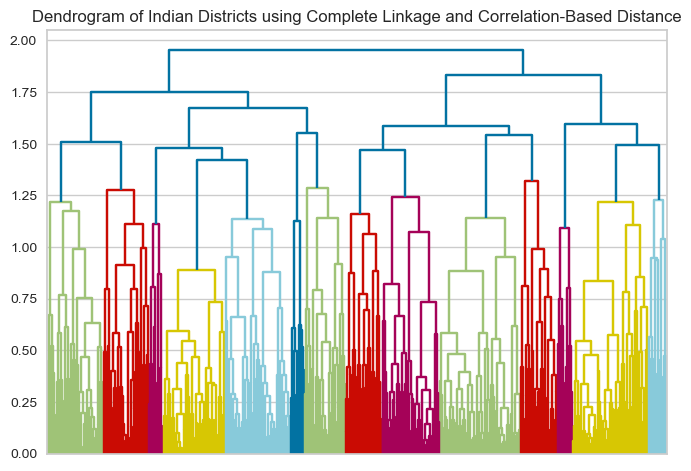

In [17]:
linkage_complete = linkage(df_districts_scaled.values, method = 'complete', metric = 'correlation')
dendrogram(linkage_complete, no_labels = True)
plt.title('Dendrogram of Indian Districts using Complete Linkage and Correlation-Based Distance')
plt.show()
plt.close()

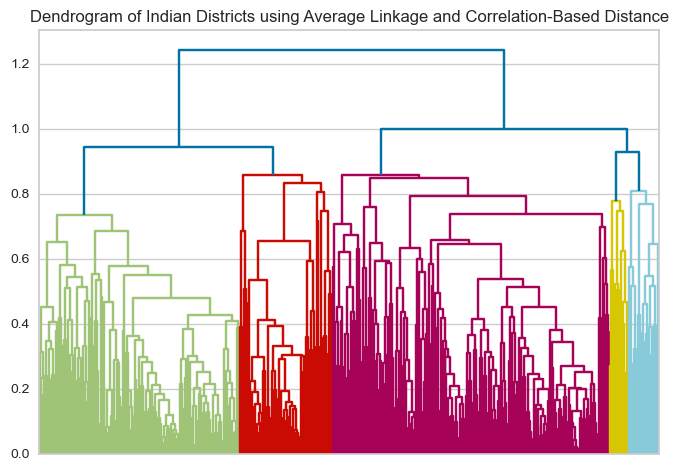

In [18]:
linkage_avg = linkage(df_districts_scaled.values, method = 'average', metric = 'correlation')
dendrogram(linkage_avg, no_labels = True)
plt.title('Dendrogram of Indian Districts using Average Linkage and Correlation-Based Distance')
plt.show()
plt.close()

Complete and Average linkages result in quite different dendrograms. Let's talk about the dendrogram using Average linkage first - the default clusters (shown in the plot) are quite unbalanced (lowest cluster contains 19 districts, highest cluster contains 286). And the way the dendrogram is built - a lot of fusion among the leaves and branches happen at a very small height, there is no way we can split the bigger clusters without creating a lot of mini-clusters. So, Average Linkage is not an option for me.

For the dendrogram using Complete linkage, by default the dataset is getting split into 14 clusters. Although just looking at the plot, the clusters look somewhat balanced - the number of clusters seems pretty high to me. Determining the optimum number of clusters is not simple though (as evidenced in this whole notebook). In terms of hierarchical clustering, leaves getting fused together at the bottom indicate maximum closeness (in terms of distance, correlation-based in our case), on the other hand the clusters getting fused at the top are maximum distance apart. So, the less height (closer to bottom) I use to cut the dendrogram - the more closely related clusters I'll get, but then the number of clusters increases. I somehow need to find a balance.

Ideally, I want to have less than 10 clusters. I can cut the dendrogram in 2 ways - I can specify the number of clusters, and the scipy method will cut it accordingly; or I can specify the height (based on the plot) and it will be cut horizontally according to that, each cut branch below that height will form a cluster. I liked the 2nd method better - easier to visualize for me. After looking at the heights where the fusions are happening, and trying several heights of cut based on that, I chose this one -

In [19]:
dn = dendrogram(linkage_complete, no_plot = True)
sorted_fusion_heights = sorted([coordinates[1] for coordinates in dn['dcoord']], reverse = True)
print(f'From Top, 10 Heights where Clusters Fused : ')
for i in range(10):
    print(round(sorted_fusion_heights[i], 4))

From Top, 10 Heights where Clusters Fused : 
1.9527
1.8303
1.7509
1.6719
1.5943
1.5855
1.5532
1.5423
1.5057
1.4915


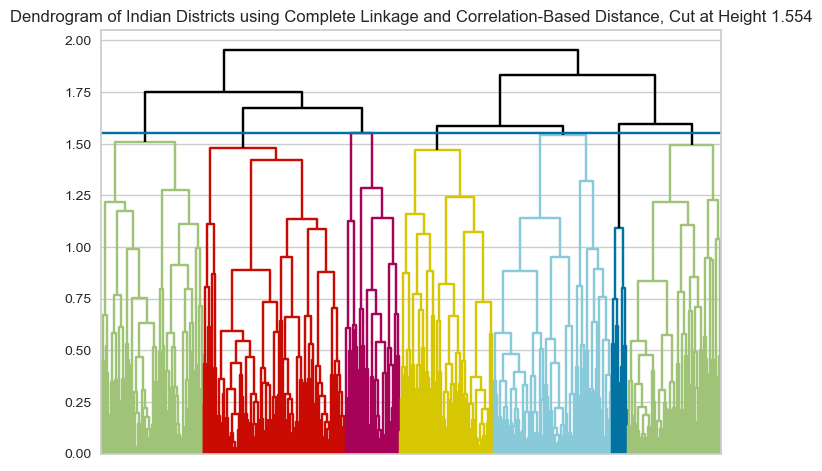

In [20]:
cut_height = 1.554
dendrogram(linkage_complete, no_labels = True, color_threshold = cut_height, above_threshold_color = 'black')
plt.title('Dendrogram of Indian Districts using Complete Linkage and Correlation-Based Distance, Cut at Height {}'\
                                                          .format(cut_height))
plt.axhline(y = cut_height)
plt.show()
plt.close()

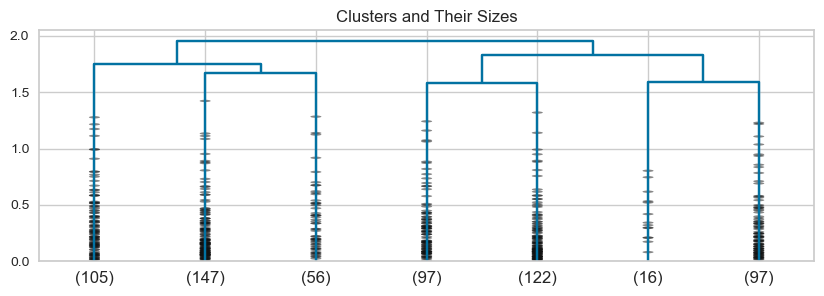

In [21]:
plt.figure(figsize = (10, 3))
dendrogram(linkage_complete, show_leaf_counts = True, truncate_mode = 'lastp', p = 7, show_contracted = True)
plt.title('Clusters and Their Sizes')
plt.show()
plt.close()

This is dividing the dataset into 7 clusters. I would have preferred avoiding the cluster of size 16 (second from right), but that becomes impossible if I still want to split the biggest cluster into smaller clusters with with 97 and 122 districts (the 2 clusters on the left of the smallest cluster).

After all this analysis, these 3 models look better than the others -
1) KMeans on Scaled dataset & Euclidean distance, with 5 Clusters
2) KMeans on Scaled dataset & Correlation-based distance, with 6 Clusters
3) Hierarchical Clustering on Complete Linkage and Correlation-based distance of Scaled dataset, with 7 Clusters (or cut at the height of 1.554)

I am not going to make a choice among these right now. Let me label these 3 types of clusters and then let's look at the distinction among these clusters, & similarities within them - I'll take a call (or not) after that. To be honest, I like the 2nd and 3rd model more than the 1st one - simply because they are correlation based, and all I'm trying to do is find relationships among these districts based on this dataset.

A word of caution for the correlation-based distance models though, correlation (by default we used Pearson's r) is a very good measure of linear relationships - but it's not so great at measuring non-linear relationships. So, our correlation based models won't work very well if the districts (their data) are correlated in a non-linear fashion - Brownian Correlation or MIC would have worked better in that case, but I refuse to go down that rabbit hole right now.

### Model(s)

In [22]:
# Model 1 : KME5 - KMeans based on Euclidean distance between datapoints, 5 Clusters
km_euclidean_model = KMeans(n_init = 50, random_state = 76, n_clusters = 5)
km_euclidean_model.fit(df_districts_scaled)
df_districts['Label_KME5'] = km_euclidean_model.labels_
df_pca['Label_KME5'] = km_euclidean_model.labels_
# storing the data in unscaled dataframe, and PCA dataframe for further exploration

In [23]:
# Model 2 : KMC6 - KMeans on Correlation-based distance between datapoints, 6 Clusters
corr_matrix_scaled = np.corrcoef(df_districts_scaled)
corr_dist_matrix_scaled = 1 - corr_matrix_scaled
km_corr_model = KMeans(n_init = 50, random_state = 76, n_clusters = 6)
km_corr_model.fit(corr_dist_matrix_scaled)
df_districts['Label_KMC6'] = km_corr_model.labels_
df_pca['Label_KMC6'] = km_corr_model.labels_

In [24]:
# Model 3 : HCC7 - Hierarchical Clustering on Correlation-based distance between datapoints, 7 Clusters
linkage_complete = linkage(df_districts_scaled.values, method = 'complete', metric = 'correlation')
cut_height = 1.554
hclust_labels = cut_tree(linkage_complete, height = cut_height)
df_districts['Label_HCC7'] = hclust_labels
df_pca['Label_HCC7'] = hclust_labels

### Exploring The Clusters
I have trained the models, but need some certainty that the clustering makes sense. I'll explore the cluster datapoints in respect to various features to see how the clusters are different from each other. But first, I'll recreate the Plotly PCA plots, this time with cluster information.

Ultimately though, I want to plot all these districts on the map of India and that'll really show us whether our grouping holds any real meaning. Our clustering dataset contains no geographic information, the state names were also kept in the index and not fed to the model. In spite of all that, if similar districts get clustered together - that will verify the correctness of my approach. I would expect districts in the same cluster to have had similar Population growth (or contraction) and similar Sex Ratio (Female Percentage) over the last 100+ years and to have a similar Male/Female Main Working (those who worked for more than 6 months during last year) share of the population in 2011. By that logic, our clustering should not follow the state boundaries, but similar districts (sometimes adjacent, sometimes not) should fall under the same cluster.

In [25]:
fig = px.scatter_3d(df_pca,
                    x = 'PC1',
                    y = 'PC2',
                    z = 'PC3',
                    color = 'Label_KME5',
                    hover_name = 'Name',
                    title = 'PCA Plot of Indian Districts Data Based on KMeans of Euclidean Distance')

# fig.show()
# Figure removed from output to reduce notebook size
# ineractive html plots available at https://1drv.ms/f/s!Ag4Lt0BAwivG5QMDT-lICszZG-Sy?e=ZHTGNB
fig.write_html('InteractivePlotsMaps/Clustering_PCA_KME5.html')

In [26]:
fig = px.scatter_3d(df_pca,
                    x = 'PC1',
                    y = 'PC2',
                    z = 'PC3',
                    color = 'Label_KMC6',
                    hover_name = 'Name',
                    title = 'PCA Plot of Indian Districts Data Based on KMeans of Correlation-Based Distance')

# fig.show()
# Figure removed from output to reduce notebook size
# ineractive html plots available at https://1drv.ms/f/s!Ag4Lt0BAwivG5QMDT-lICszZG-Sy?e=ZHTGNB
fig.write_html('InteractivePlotsMaps/Clustering_PCA_KMC6.html')

In [27]:
fig = px.scatter_3d(df_pca,
                    x = 'PC1',
                    y = 'PC2',
                    z = 'PC3',
                    color = 'Label_HCC7',
                    hover_name = 'Name',
                    title = 'PCA Plot of Indian Districts Data Based on Hirearchical Clustering '\
                    'of Correlation-Based Distance')

# fig.show()
# Figure removed from output to reduce notebook size
# ineractive html plots available at https://1drv.ms/f/s!Ag4Lt0BAwivG5QMDT-lICszZG-Sy?e=ZHTGNB
fig.write_html('InteractivePlotsMaps/Clustering_PCA_HCC7.html')

The separation between the clusters is not very obvious - we had already seen that the points are very close.

Here is a look at how the 3 descriptive features (AvgPopGrowth, AvgFemPct, TotMWpct) of our dataset varies across the various type of clusters. The detailed features will be hard to cover in a similar manner - we'll look at them through visual representations.

In [28]:
df_descriptive_gb = df_districts[['Label_KME5', 'Label_KMC6', 'Label_HCC7', 'AvgPopGrowth', 'AvgFemPct', 'TotMWpct']]
pd.concat([df_descriptive_gb.groupby('Label_KME5').describe(exclude = int).transpose(),
           df_descriptive_gb.groupby('Label_KMC6').describe(exclude = int).transpose(),
           df_descriptive_gb.groupby('Label_HCC7').describe(exclude = int).transpose()],
          axis = 1,
          keys = ['KME5', 'KMC6', 'HCC7'])

KME5                                      \
                                  0           1           2           3   
             Year                                                         
AvgPopGrowth      count  154.000000  119.000000  100.000000  100.000000   
                  mean    16.730244   13.445269   15.408664   32.903252   
                  std      6.105958    3.088641    2.850040   17.245977   
                  min     -2.724502    4.246114   10.549494   17.193045   
                  25%     13.795036   11.509932   13.666126   22.104678   
                  50%     16.091609   13.370671   15.126629   27.845093   
                  75%     18.015926   15.092001   16.571095   36.513113   
                  max     63.351560   24.384857   27.477594  146.893881   
AvgFemPct         count  154.000000  119.000000  100.000000  100.000000   
                  mean    46.246074   50.554153   49.537001   46.823480   
                  std      2.063256    0.964962    0.712305    1.308271   
                  min     32.129755   49.062661   48.137556   41.326673   
                  25%     45.749119   49.903206   49.055751   46.156202   
                  50%     46.446271   50.367447   49.448263   47.201666   
                  75%     47.258852   50.998395   50.004723   47.676925   
                  max     48.407568   54.246729   51.940978   48.725110   
TotMWpct          count  154.000000  119.000000  100.000000  100.000000   
                  mean    24.374622   29.989919   18.301411   28.807432   
                  std      5.553663    5.846417    4.083354    4.807879   
                  min     13.242887   19.385716   11.513079   17.120296   
                  25%     20.462752   25.390430   15.255801   25.556762   
                  50%     24.009860   29.629862   17.674372   28.036821   
                  75%     27.328768   34.897189   20.616715   31.391000   
                  max     49.437120   42.692509   30.657135   46.149229   

                                          KMC6                          \
                                  4          0           1           2   
             Year                                                        
AvgPopGrowth      count  167.000000  90.000000  106.000000   88.000000   
                  mean    20.558581  19.313143   17.982572   20.642929   
                  std      9.663310   7.121269    4.901930   12.288382   
                  min     11.676935  -2.724502   11.934921   11.635453   
                  25%     16.077153  16.024234   14.930913   15.630088   
                  50%     18.438516  18.495431   16.463954   18.231284   
                  75%     22.039762  21.712980   19.142470   21.167813   
                  max    118.258901  45.829689   35.839730  118.258901   
AvgFemPct         count  167.000000  90.000000  106.000000   88.000000   
                  mean    48.984456  47.773535   49.271197   47.575771   
                  std      0.551145   1.770970    0.629857    0.861223   
                  min     47.542021  38.538611   47.718798   45.432026   
                  25%     48.604736  47.419313   48.839106   46.929334   
                  50%     48.974697  48.364505   49.289248   47.570707   
                  75%     49.320078  48.754617   49.730139   48.230690   
                  max     50.486996  49.760110   51.146689   49.329910   
TotMWpct          count  167.000000  90.000000  106.000000   88.000000   
                  mean    31.829936  30.955470   21.223124   23.662944   
                  std      4.881562   4.586416    6.532163    5.648291   
                  min     20.375062  21.178238   11.696392   13.242887   
                  25%     28.271351  27.945997   16.133333   19.718934   
                  50%     32.267578  30.664455   19.531805   23.337727   
                  75%     35.121756  34.085864   25.645431   26.813902   
                  max     51.726970  41.740319   51.726970   37.141217   

      

Now let's look at the detailed features across all clusters. Just want to reiterate the nomenclature I have been following for the 3 models I have trained and their output, since the plots are going to be using these as well :
1) KME5 - KMeans based on Euclidean distance between datapoints, 5 Clusters
2) KMC6 - KMeans on Correlation-based distance between datapoints, 6 Clusters
3) HCC7 - Hierarchical Clustering on Correlation-based distance between datapoints, 7 Clusters

Regarding the stats above, and the following visual representations, one point needs to be clarified - the Cluster 0 of each of the models has no connection with each other, and the same goes for all the other clusters. Cluster 4 of KME5 and Cluster 4 of HCC7 may have a few districts in common or may not have anything in common. I have been and will be showing them side by side, but that's not supposed to be a comparison between similar clusters of the 3 models themselves - but that's just me trying to show the various clusters in a concise manner, showing each model separately (like I did for the PCA plots) just hogs a lot of notebook real estate. the comparison is supposed to be within clusters of the same model, and the models as a whole.

In [29]:
# keyword argument dictionary for cluster-label wise lines, and list of cluster labels
label_kwargs_map = {
    0 : {'c' : 'orange', 'ls' : '--', 'lw' : 0.6, 'label' : 0, 'marker' : 'o'},
    # circle marker, dashed line
    1 : {'c' : 'palegreen', 'ls' : '-.', 'lw' : 0.6, 'label' : 1, 'marker' : 's'},
    # square marker, dash-dot line
    2 : {'c' : 'darkgrey', 'ls' : '--', 'lw' : 0.6, 'label' : 2, 'marker' : '^'},
    # triangle-up marker, dashed line
    3 : {'c' : 'thistle', 'ls' : ':', 'lw' : 0.6, 'label' : 3, 'marker' : '.'},
    # point marker, dotted line
    4 : {'c' : 'paleturquoise', 'ls' : ':', 'lw' : 0.6, 'label' : 4, 'marker' : 'h'},
    # hexagonal marker, dotted line
    5 : {'c' : 'darkkhaki', 'ls' : '--', 'lw' : 0.6, 'label' : 5, 'marker' : '<'},
    # triangle left marker, dashed line
    6 : {'c' : 'peru', 'ls' : '-.', 'lw' : 0.6, 'label' : 6, 'marker' : '>'}
    # triangle right marker, dash-dot line
}
label_cols = ['Label_KME5', 'Label_KMC6', 'Label_HCC7']

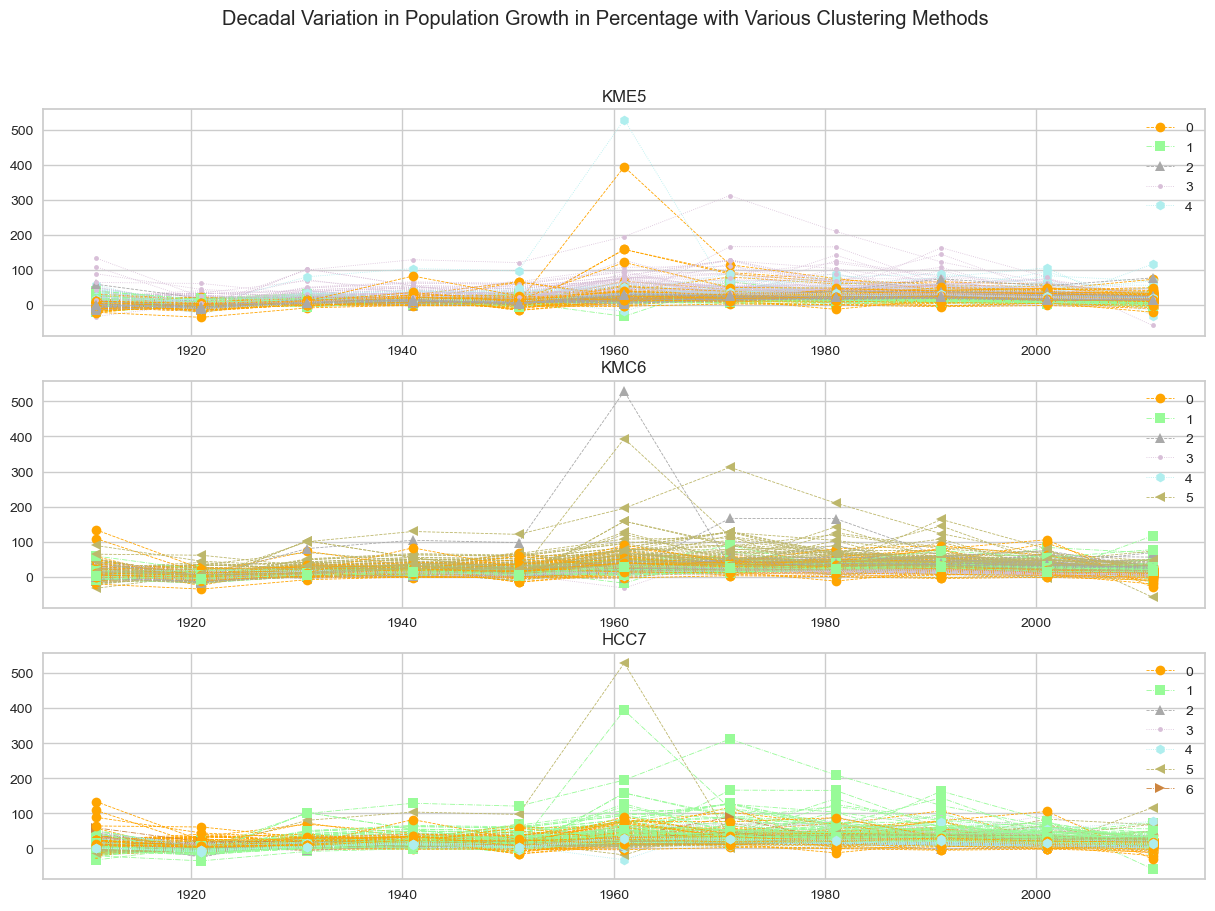

In [30]:
# Decadal Variation in Population Growth in Percentage
# label_kwargs_map, label_cols predefined

f, ax = plt.subplots(3, 1, figsize = (15, 10))

for cluster_no in range(3):
    col = label_cols[cluster_no]
    plot_label = col.split('_')[1]
    for (dist, state) in df_districts.index:
        dist_decadal_var_pop = df_districts.loc[(dist, state)].Pct_var_since_last
        dist_label = int(df_districts.loc[(dist, state), col])
        ax[cluster_no].plot(dist_decadal_var_pop.index, dist_decadal_var_pop, **label_kwargs_map[dist_label])
    handles, labels = ax[cluster_no].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    by_label_sorted = OrderedDict(sorted(by_label.items()))
    ax[cluster_no].legend(by_label_sorted.values(), by_label_sorted.keys())
    ax[cluster_no].set_title(plot_label)
plt.suptitle('Decadal Variation in Population Growth in Percentage with Various Clustering Methods')
plt.show()
plt.close()

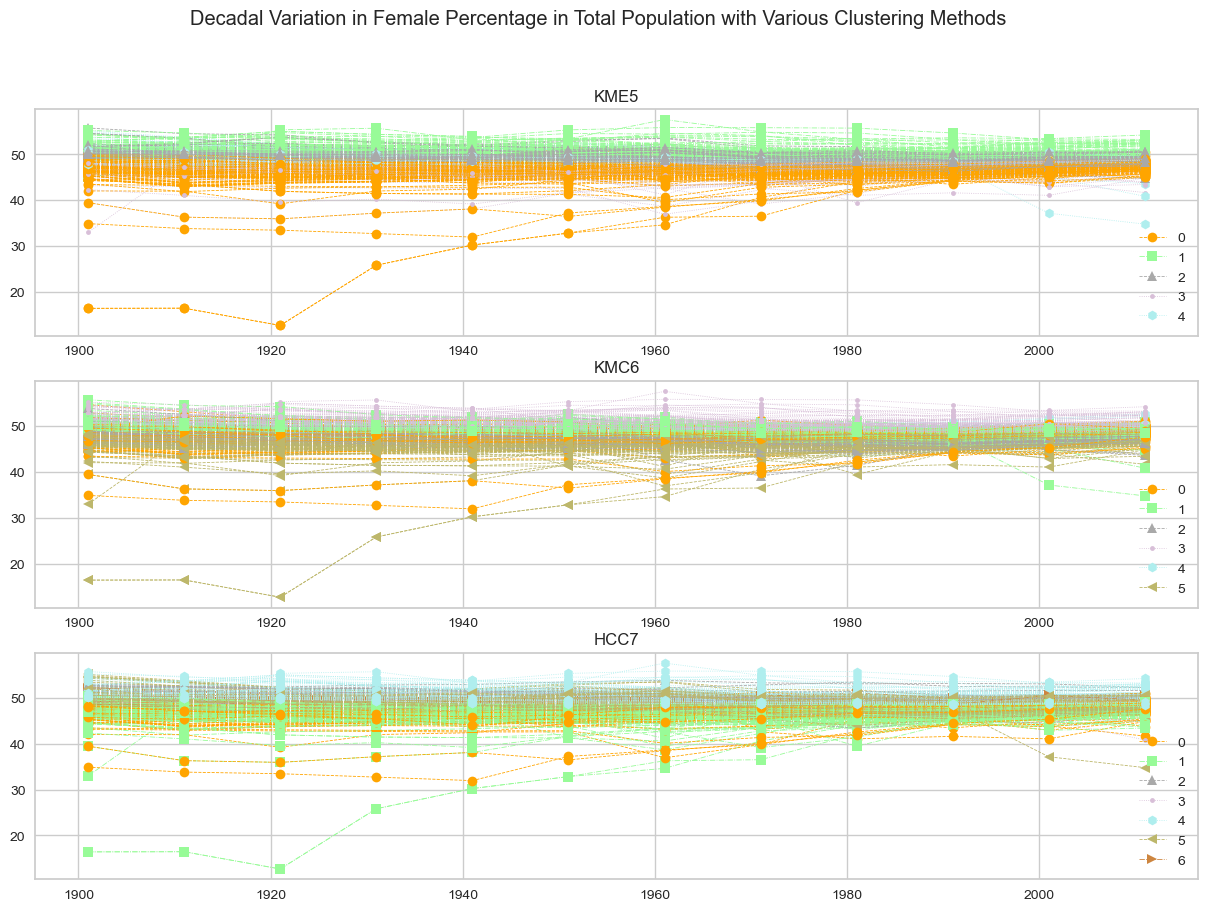

In [31]:
# Decadal Variation in Female Percentage in Total Population
# label_kwargs_map, label_cols predefined

f, ax = plt.subplots(3, 1, figsize = (15, 10))

for cluster_no in range(3):
    col = label_cols[cluster_no]
    plot_label = col.split('_')[1]
    for (dist, state) in df_districts.index:
        dist_decadal_var_pop = df_districts.loc[(dist, state)].Female_pct
        dist_label = int(df_districts.loc[(dist, state), col])
        ax[cluster_no].plot(dist_decadal_var_pop.index, dist_decadal_var_pop, **label_kwargs_map[dist_label])
    handles, labels = ax[cluster_no].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    by_label_sorted = OrderedDict(sorted(by_label.items()))
    ax[cluster_no].legend(by_label_sorted.values(), by_label_sorted.keys())
    ax[cluster_no].set_title(plot_label)
plt.suptitle('Decadal Variation in Female Percentage in Total Population with Various Clustering Methods')
plt.show()
plt.close()

To be honest, these are not very clear - I can't actually find anything relevant about how the clusters differ. Let me segregate these in separate plots.

In [32]:
# keyword argument dictionary for cluster-label wise lines, and list of cluster labels
label_kwargs_map = {
    0 : {'c' : 'orange', 'ls' : '--', 'lw' : 0.8, 'marker' : 'o'},
    # circle marker, dashed line
    1 : {'c' : 'palegreen', 'ls' : '-.', 'lw' : 0.8, 'marker' : 's'},
    # square marker, dash-dot line
    2 : {'c' : 'darkgrey', 'ls' : '--', 'lw' : 0.8, 'marker' : '^'},
    # triangle-up marker, dashed line
    3 : {'c' : 'paleturquoise', 'ls' : ':', 'lw' : 0.8, 'marker' : '.'},
    # point marker, dotted line
    4 : {'c' : 'thistle', 'ls' : ':', 'lw' : 0.8, 'marker' : 'h'},
    # hexagonal marker, dotted line
    5 : {'c' : 'darkkhaki', 'ls' : '--', 'lw' : 0.8, 'marker' : '<'},
    # triangle left marker, dashed line
    6 : {'c' : 'peru', 'ls' : '-.', 'lw' : 0.8, 'marker' : '>'}
    # triangle right marker, dash-dot line
}
label_cols = ['Label_KME5', 'Label_KMC6', 'Label_HCC7']

In [33]:
# Plotting Decadal Variation of Population Growth, for all 3 models
fig = plt.figure(layout = 'compressed', dpi = 400, figsize = (18, 30))

gs = gridspec.GridSpec(7, 6, figure = fig)
plot_start = 0
plot_width = 2

for model_label_counter in range(3):
    model = label_cols[model_label_counter].split('_')[1]
    label_count = int(label_cols[model_label_counter][-1])
    axes = []
    ax_count = 0
    while label_count > ax_count:
        axes.append(plt.subplot(gs[ax_count, plot_start : plot_start + plot_width]))
        ax_count += 1
    plot_start = plot_start + plot_width
    for label in range(label_count):
        axes[label].set(xlabel = 'Year',
                            ylabel = '%Change in Total Population',
                            title = 'Cluster {}, Model {}'.format(label, model))
        for (dist, state) in df_districts[df_districts[label_cols[model_label_counter]] == label].index:
            decadal_var = df_districts.loc[(dist, state)].Pct_var_since_last
            axes[label].plot(decadal_var.index, decadal_var, **label_kwargs_map[label])
            
fig.suptitle('Decadal Variation of Population in Percentage')
# plt.show()
# hiding the image here, since notebook size was a concern for github visibility
# github has trouble showing notebooks near 30 MB range, and this image adds almost 13 MB
plt.savefig('StaticPlots/Clustering_PopVar_Clusters.jpg')
plt.close()

In [34]:
# Plotting Decadal Variation of Female Percentage, for all 3 models
fig = plt.figure(layout = 'compressed', dpi = 400, figsize = (18, 30))

gs = gridspec.GridSpec(7, 6, figure = fig)
plot_start = 0
plot_width = 2

for model_label_counter in range(3):
    model = label_cols[model_label_counter].split('_')[1]
    label_count = int(label_cols[model_label_counter][-1])
    axes = []
    ax_count = 0
    while label_count > ax_count:
        axes.append(plt.subplot(gs[ax_count, plot_start : plot_start + plot_width]))
        ax_count += 1
    plot_start = plot_start + plot_width
    for label in range(label_count):
        axes[label].set(xlabel = 'Year',
                            ylabel = 'Female% in Total Population',
                            title = 'Cluster {}, Model {}'.format(label, model))
        for (dist, state) in df_districts[df_districts[label_cols[model_label_counter]] == label].index:
            decadal_var = df_districts.loc[(dist, state)].Female_pct
            axes[label].plot(decadal_var.index, decadal_var, **label_kwargs_map[label])
            
fig.suptitle('Decadal Variation of Female Percentage')
# plt.show()
# hiding the image here, since notebook size was a concern for github visibility
# github has trouble showing notebooks near 30 MB range, and this image adds almost 13 MB
plt.savefig('StaticPlots/Clustering_FemPct_Clusters.jpg')
plt.close()

To plot Male/Female MainWorkers pct, I need to change the shape of the dataset a bit - a sample change is shown below.

In [35]:
df_MainWorker_plot = df_districts[['FemaleMWpct', 'MaleMWpct', 'Label_KME5']]\
                                        .melt(value_vars=[('FemaleMWpct', 'Rural'),
                                                          ('FemaleMWpct', 'Urban'),
                                                          ('MaleMWpct', 'Rural'),
                                                          ('MaleMWpct', 'Urban')],
                                              id_vars = 'Label_KME5',
                                              var_name = ['Gender', 'Area'])
df_MainWorker_plot['Gender'] = df_MainWorker_plot.Gender.str.replace('MWpct', '')
# to replace FemaleMWpct/MaleMWpct with Female/Male respectively
df_MainWorker_plot

,Label_KME5,Gender,Area,value
0,3,Female,Rural,4.421584
1,0,Female,Rural,4.471718
2,0,Female,Rural,2.017284
3,4,Female,Rural,12.154650
4,1,Female,Rural,14.581425
...,...,...,...,...
2555,0,Male,Urban,16.357036
2556,0,Male,Urban,26.006462
2557,3,Male,Urban,5.932533
2558,2,Male,Urban,2.737485


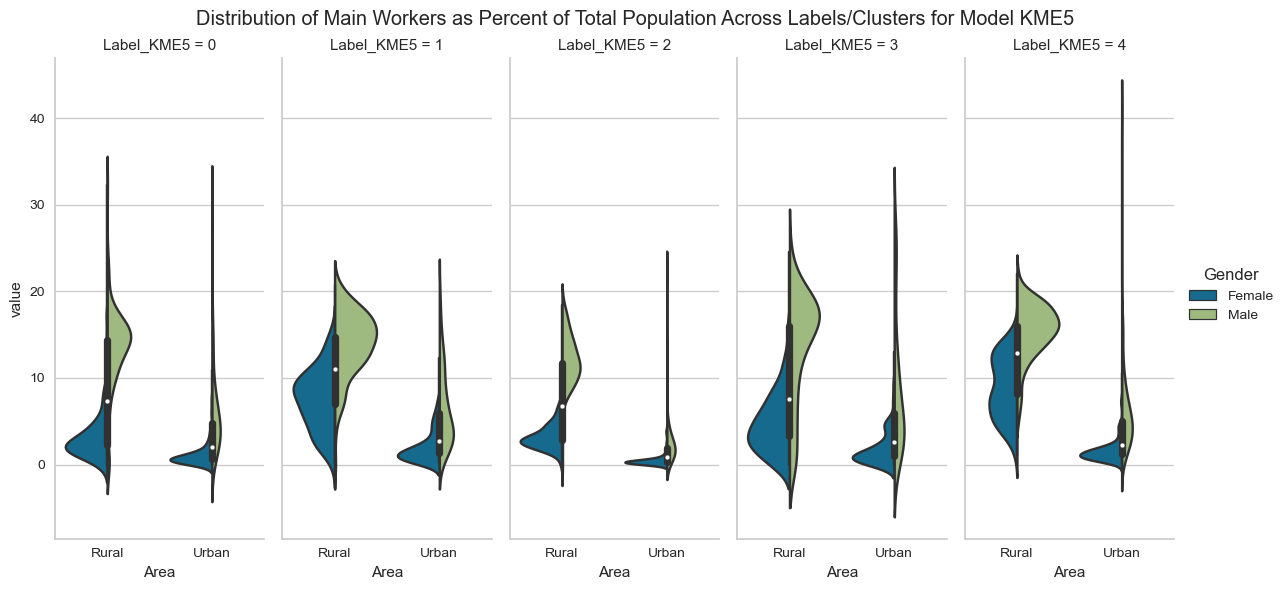

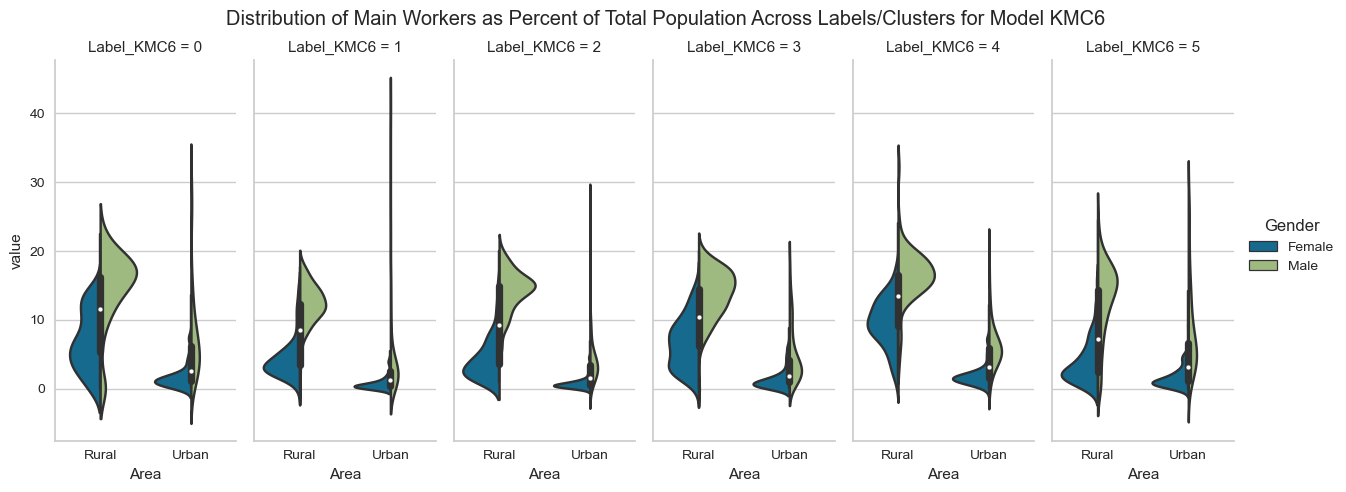

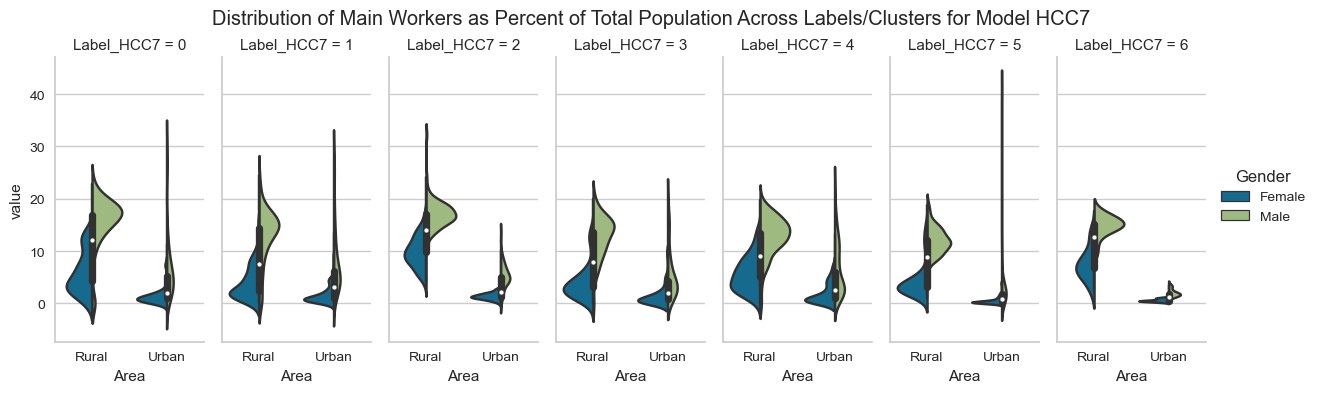

In [36]:
base_height = 6
base_aspect = 0.4
base_title_height_ratio = 0.9
for label_col in label_cols:
    model = label_col.split('_')[1]
    label_count = int(label_col[-1])
    plot_height = base_height - label_count + 5
    plot_aspect = base_aspect + 0.02 * (label_count - 5)
    plot_title_height_ratio = base_title_height_ratio - 0.02 * (label_count - 5)
    df_MainWorker_plot = df_districts[['FemaleMWpct', 'MaleMWpct', label_col]]\
                                        .melt(value_vars=[('FemaleMWpct', 'Rural'),
                                                          ('FemaleMWpct', 'Urban'),
                                                          ('MaleMWpct', 'Rural'),
                                                          ('MaleMWpct', 'Urban')],
                                              id_vars = label_col,
                                              var_name = ['Gender', 'Area'])
    df_MainWorker_plot['Gender'] = df_MainWorker_plot.Gender.str.replace('MWpct', '')
    plot = sns.catplot(data = df_MainWorker_plot,
                       x = 'Area',
                       y = 'value',
                       hue = 'Gender',
                       kind = 'violin',
                       col = label_col,
                       split = True,
                       height = plot_height,
                       aspect = plot_aspect)
    plot.fig.subplots_adjust(top = plot_title_height_ratio)
    title = f'Distribution of Main Workers as Percent of Total Population Across Labels/Clusters for Model {model}'
    plot.fig.suptitle(title)
    plt.show()
plt.close()

This isn't a very legible plot, let me try again.

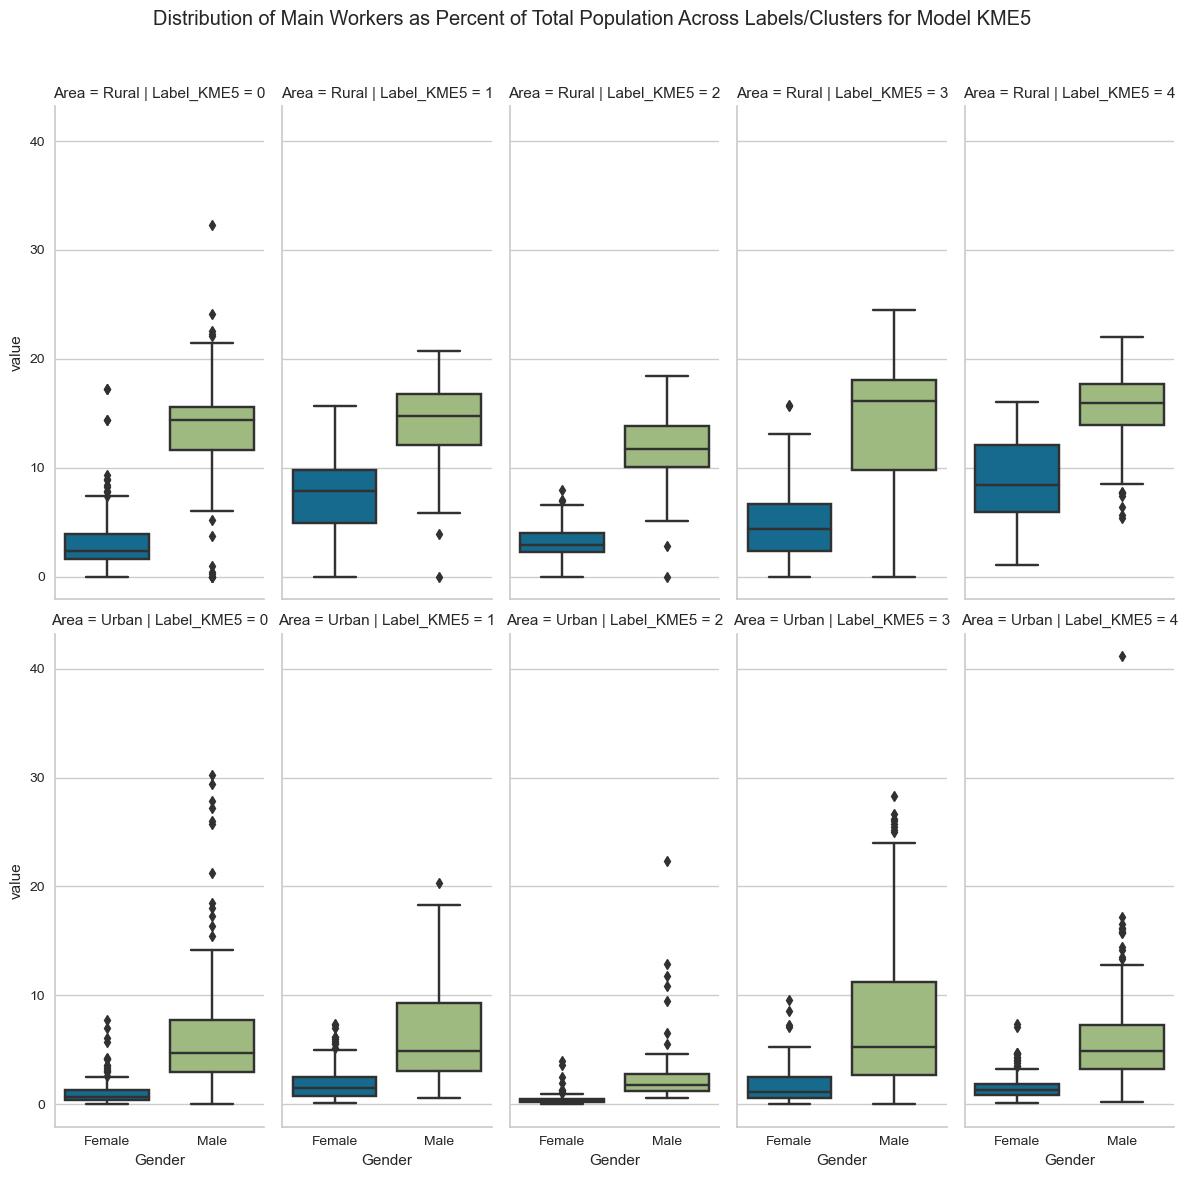

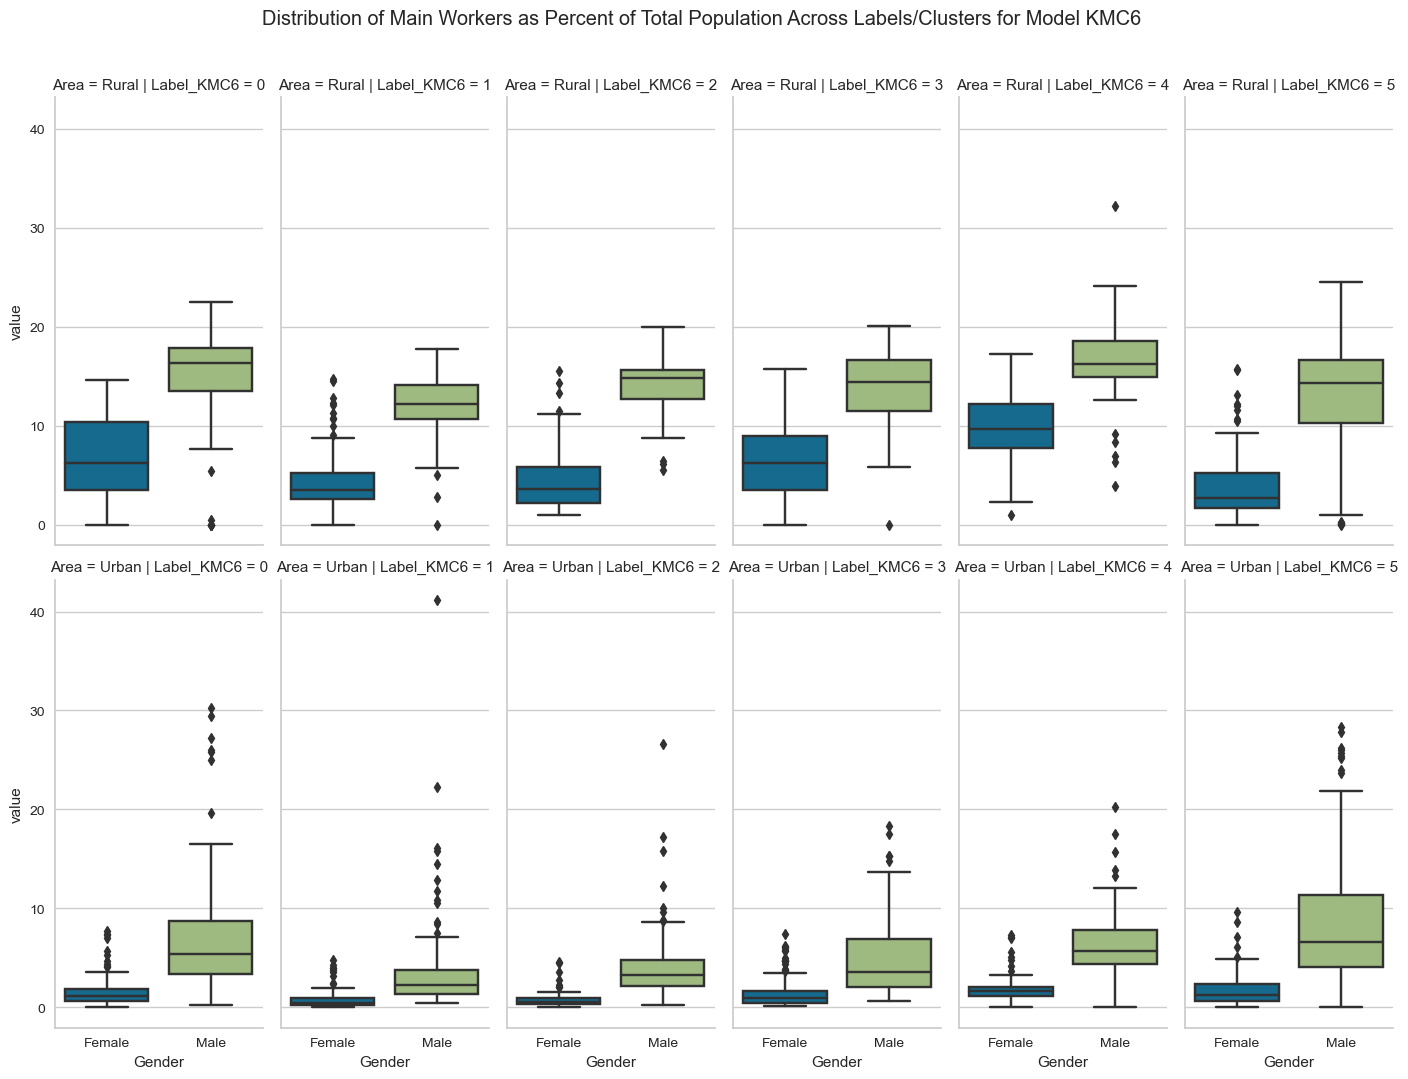

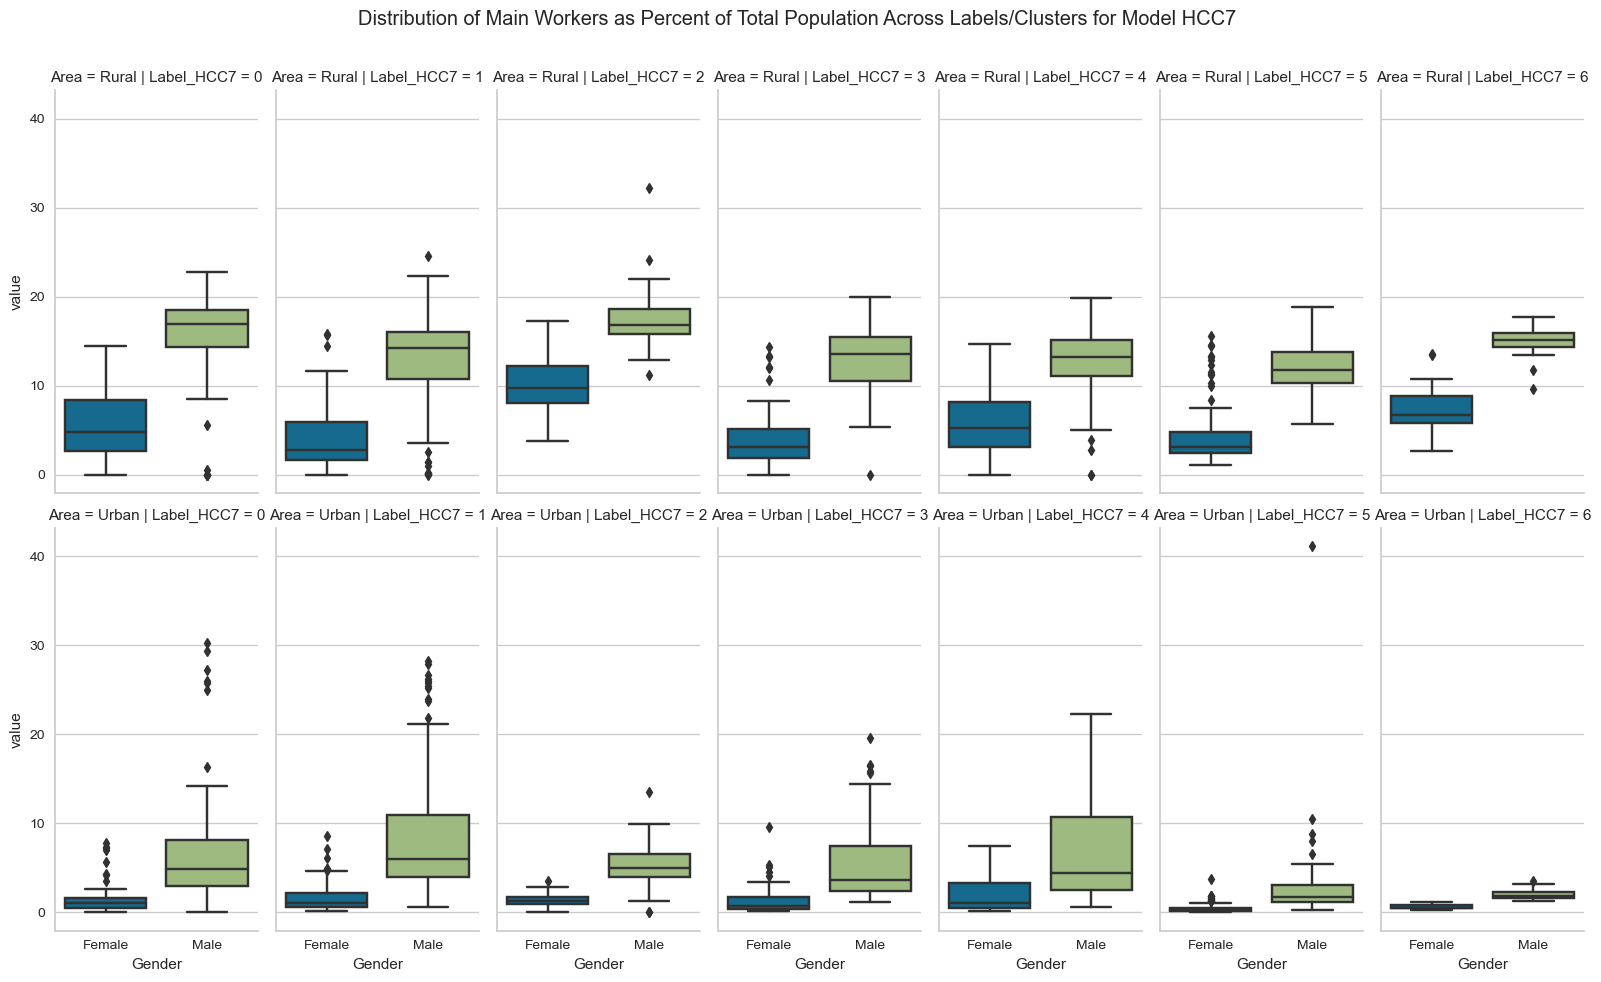

In [37]:
base_height = 6
base_aspect = 0.4
for label_col in label_cols:
    model = label_col.split('_')[1]
    label_count = int(label_col[-1])
    plot_height = base_height - 0.5 * (label_count - 5)
    plot_aspect = base_aspect + 0.03 * (label_count - 5)
    df_MainWorker_plot = df_districts[['FemaleMWpct', 'MaleMWpct', label_col]]\
                                        .melt(value_vars=[('FemaleMWpct', 'Rural'),
                                                          ('FemaleMWpct', 'Urban'),
                                                          ('MaleMWpct', 'Rural'),
                                                          ('MaleMWpct', 'Urban')],
                                              id_vars = label_col,
                                              var_name = ['Gender', 'Area'])
    df_MainWorker_plot['Gender'] = df_MainWorker_plot.Gender.str.replace('MWpct', '')
    plot = sns.catplot(data = df_MainWorker_plot,
                       x = 'Gender',
                       y = 'value',
                       row = 'Area',
                       kind = 'box',
                       col = label_col,
                       height = plot_height,
                       aspect = plot_aspect)
    plot.fig.subplots_adjust(top = 0.9)
    title = f'Distribution of Main Workers as Percent of Total Population Across Labels/Clusters for Model {model}'
    plot.fig.suptitle(title)
    plt.show()
plt.close()

Just looking at the data for each cluster together, I don't have a preference for any of the models - so, I'll keep all 3 labels. Now that we have explored the datapoints in each of these clusters quite thoroughly, what remains is to plot these districts and their clusters in a Geographical map of India - I'll continue that in the next notebook.

I'll need the districts and their cluster information there - so, let me export our data. I need a flat structure to store the datapoints and cluster-info in a csv format. I no longer need the district and state names in indexes. So, let me reshape the table.

In [38]:
# Flat structure for csv
df_districts_flat = df_districts.reset_index()
df_districts_flat.columns = ['_'.join([str(ctm), str(cts)]) if (str(cts) != '') else ''.join([str(ctm), str(cts)])\
                                    for (ctm, cts) in df_districts_flat.columns]
# ctm = column title main, cts = column title secondary
# converting the multi-indexed column to normal column names
df_districts_flat

,Name,StateName,Female_pct_1901,Female_pct_1911,Female_pct_1921,Female_pct_1931,Female_pct_1941,Female_pct_1951,Female_pct_1961,Female_pct_1971,...,AvgPopGrowth,AvgFemPct,FemaleMWpct_Rural,FemaleMWpct_Urban,MaleMWpct_Rural,MaleMWpct_Urban,TotMWpct,Label_KME5,Label_KMC6,Label_HCC7
0,NICOBARS,ANDAMANNICOBARISLANDS,45.676547,45.191653,43.464193,46.835938,47.108898,47.364477,46.576942,43.937226,...,18.480369,45.540005,4.421584,0.000000,20.655773,0.000000,25.077357,3,5,0
1,NORTHMIDDLEANDAMAN,ANDAMANNICOBARISLANDS,16.430919,16.468341,12.700029,25.832547,30.224924,32.841328,34.627797,40.606656,...,35.130811,32.886754,4.471718,0.172353,22.079226,0.606078,27.329375,0,5,1
2,SOUTHANDAMAN,ANDAMANNICOBARISLANDS,16.428764,16.457449,12.705667,25.825851,30.234512,32.846715,36.285068,36.515563,...,39.406520,32.129755,2.017284,4.121491,10.663386,17.261970,34.064130,0,5,1
3,ADILABAD,ANDHRAPRADESH,49.767194,49.394224,48.837121,48.886006,49.342754,50.193963,49.514115,49.387898,...,18.030833,49.503822,12.154650,1.640973,14.910630,5.586270,34.292522,4,4,2
4,NIZAMABAD,ANDHRAPRADESH,50.144858,50.145012,50.402421,49.755365,49.843247,50.463793,50.176476,49.965354,...,13.508681,50.254258,14.581425,1.949411,15.882077,4.666851,37.079764,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,HAORA,WESTBENGAL,48.322426,47.149980,46.345559,45.482483,44.076443,44.754939,44.694397,45.446464,...,17.470092,46.308916,1.111313,2.528603,8.490506,16.357036,28.487459,0,5,0
636,KOLKATA,WESTBENGAL,34.895079,33.820707,33.464912,32.725302,31.961330,37.224127,38.639970,39.841858,...,16.174832,38.538611,0.000000,5.691381,0.000000,26.006462,31.697843,0,0,0
637,SOUTHTWENTYFOURPARGANAS,WESTBENGAL,48.116473,47.208953,46.564336,46.404160,45.843134,46.258002,47.943863,47.826976,...,20.782149,47.473110,1.852619,0.998142,13.772609,5.932533,22.555903,3,5,0
638,PASCHIMMEDINIPUR,WESTBENGAL,50.155053,49.995968,49.762899,49.375544,48.860737,48.980004,48.792453,48.631590,...,13.656078,49.185827,3.539994,0.518090,16.680209,2.737485,23.475777,2,3,4


In [39]:
df_districts_flat.to_csv('ProcessedData/IndianDistricts_DataClusters.csv', index = False)